<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# Principal Component Analysis

If you were paying attention in the last example, you may have noticed that T-SNE uses Principal Component Analysis (PCA) "under the hood" to help it perform dimension reduction. 

If you want to know more about what PCA is and how it works, here's a good StatQuest.

[StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ&t=221s) (21min 57s)



## Using PCA for dimension reduction (AKA feature reduction)

In the previous example, we looked at how to use T-SNE to represent lots of dimensions of data as 2 dimensions that we could plot. 

Another approach could be to consider which features have the biggest impact on a dataset. 

In the example below, we'll look at the Iris dataset, and determine which are the Principal Components. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
iris_df = pd.read_csv('../../Data/Iris.csv')
iris_df = iris_df.drop(['Species', 'Id'], axis=1)
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(iris_df.values)

PCA()

In [4]:
transformed = pca.transform(iris_df.values)

In [5]:
import matplotlib.pyplot as plt

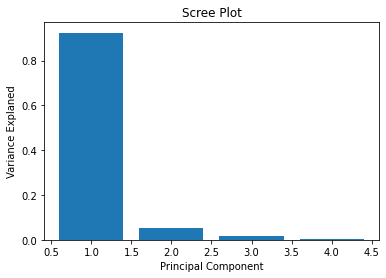

In [6]:
components = list(range (1, pca.n_components_ + 1))
variance = pca.explained_variance_ratio_

plt.bar(x=components, height=variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explaned')
plt.show()


Often times we're looking for an elbow on the chart. But it clearly shows that PC 1 has the greatest impact on the model, by some margin.

Finally Translating the Principal Components back to the columns, so we can see which columns have the biggest impact. 



In [12]:
pc_names = ['PC'+str(i+1) for i in range(pca.n_components_)]
loadings = pd.DataFrame(pca.components_,columns=pc_names,index=iris_df.columns)
loadings.iloc[:,:2]


,PC1,PC2
SepalLengthCm,0.361590,-0.082269
SepalWidthCm,0.656540,0.729712
PetalLengthCm,-0.580997,0.596418
PetalWidthCm,0.317255,-0.324094


<AxesSubplot:>

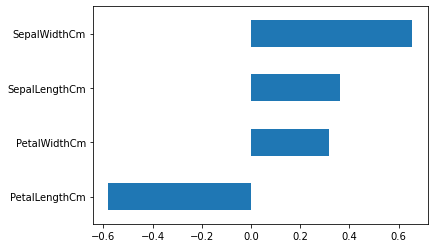

In [11]:
loadings["PC1"].sort_values().plot.barh()
# source: https://stackoverflow.com/questions/67585809/how-to-map-the-results-of-principal-component-analysis-back-to-the-actual-featur

In conclusion So it should be possible to remove the petal length from the model, without impacting the performance of the model. 



# Additional Reference 

If you want to find out more about PCA, have a look at these blogs. 


https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://www.statology.org/scree-plot-python/